# Web Scraping

Zwykłe strony scrapujemy za pomoca bilbioteki requests.

Niektóre strony moga wymagać biblioteki selenium (wtedy crawler widzi strone jak czlowiek korzytający z przeglądarki, może np. wcisnąć Enter lub korzystać z wyszukiwarki na stronie).

Crawler możemy napisać np. korzystając z bilbioteki Scrapy.

W poniższym przykładzie napiszemy bardzo prosty scaper. Ściągniemy informację ze strony Top 250 filmów na IMDB

In [3]:
url = "https://www.imdb.com/chart/top"

### Import bibliotek

In [4]:
from requests import get # funkcja do ściagania strony
from bs4 import BeautifulSoup # czytanie HTML

import pandas as pd


In [5]:
imdb = get(url) # pobieramy zawartość strony

In [10]:
imdb.status_code # 200 znaczy że jest ok

200

In [11]:
import requests

In [15]:
requests.codes.ok # w module codes możemy sprawdzić kody

200

Z tak pobranej strony trudno jest cokolwiek odczytać. 

In [16]:
imdb.content

b'\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    \n    \n    \n\n    \n    \n    \n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n            <style>\n                body#styleguide-v2 {\n                    background: no-repeat fixed center top #000;\n                }\n            </style>\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>IMDb Top 250 - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_tit

In [17]:
# Parser pozwala nam "przetłumaczyć" otrzymane treści
html = BeautifulSoup(imdb.content, "lxml") # html.parser lub lxml

Teraz dokument wygląda o wiele czytelniej. Możemy wyciągać z niego poszczególne tagi html

In [18]:
html

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
<style>
                body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
            </style>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDb Top 250 - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>
<s

Dostęp do poszczególnych składników strony

In [19]:
html.title

<title>IMDb Top 250 - IMDb</title>

In [21]:
html.title.text

'IMDb Top 250 - IMDb'

Text lub string usuwa znaczniki html wokół tekstu

In [22]:
html.p

<p>The Top Rated Movie list only includes theatrical features.</p>

In [23]:
html.p.text

'The Top Rated Movie list only includes theatrical features.'

### Wybór tagów ze strony

Aby pobierac informacje musimy znać nazwy tagów w jakich są one zawarte. Na przykład na stronie, którą scrapujemy w tym przykładzie tag `.imdbRating` zawiera informacje o ocenach filmów.

Znając html i CSS można znaleźć tagi oglądając źródło strony lub (łatwiej) klikając na stronie prawym -> zbadaj. Jeżeli nie znamy htmla i CSSa dużo lepszym rozwiązaniem bedzie skorzystanie z rozszerzenia do przeglądarki o nazwie [SelectorGadget](https://selectorgadget.com/), który pozwala nam zaznaczać interesujące nas elementy strony i uzyskiwać odpowiadające im tagi.


In [26]:
# tag .titleColumn zawiera tytuły filmów (i rok produkcji)
# pierwszy film z listy
film = html.select(".titleColumn")[0].text
film

'\n      1.\n      Skazani na Shawshank\n(1994)\n'

In [27]:
html.select(".imdbRating")[0].text

'\n9.2\n'

### Znajduję wszystkie linki na stronie

In [29]:
html.find("a")

<a href="/?ref_=nv_home"><svg class="ipc-logo WNY8DBPCS1ZbiSd7NoqdP" height="56" version="1.1" viewbox="0 0 64 32" width="98" xmlns="http://www.w3.org/2000/svg"><g fill="#F5C518"><rect height="100%" rx="4" width="100%" x="0" y="0"></rect></g><g fill="#000000" fill-rule="nonzero" transform="translate(8.000000, 7.000000)"><polygon points="0 18 5 18 5 0 0 0"></polygon><path d="M15.6725178,0 L14.5534833,8.40846934 L13.8582008,3.83502426 C13.65661,2.37009263 13.4632474,1.09175121 13.278113,0 L7,0 L7,18 L11.2416347,18 L11.2580911,6.11380679 L13.0436094,18 L16.0633571,18 L17.7583653,5.8517865 L17.7707076,18 L22,18 L22,0 L15.6725178,0 Z"></path><path d="M24,18 L24,0 L31.8045586,0 C33.5693522,0 35,1.41994415 35,3.17660424 L35,14.8233958 C35,16.5777858 33.5716617,18 31.8045586,18 L24,18 Z M29.8322479,3.2395236 C29.6339219,3.13233348 29.2545158,3.08072342 28.7026524,3.08072342 L28.7026524,14.8914865 C29.4312846,14.8914865 29.8796736,14.7604764 30.0478195,14.4865461 C30.2159654,14.2165858 30.30219

In [30]:
linki = html.find_all("a")

In [33]:
linki[0].text

linki[0]['href']

'/?ref_=nv_home'

In [36]:
# wszystkie elementy klasy title column
len(html.find_all(class_ = 'titleColumn'))

250

In [37]:
filmy = html.find_all(class_ = 'titleColumn')

Z pierwszego filmu na liście wyciągam interesujące mnie elementy

In [40]:
filmy[0].find('a')

<a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">Skazani na Shawshank</a>

Mogę wybrać adres linku do pierwszego fimu z listy

In [43]:
'https://www.imdb.com' + filmy[0].find('a')['href']

'https://www.imdb.com/title/tt0111161/'

Np. chcę wybrać nagłówek h1

In [46]:
html.find(class_ = 'header') 

<h1 class="header">Top Rated Movies</h1>

In [47]:
html.find('h1')

<h1 class="header">Top Rated Movies</h1>

In [57]:
filmy[0].text

'\n      1.\n      Skazani na Shawshank\n(1994)\n'

In [59]:
filmy[0].find('a')['title']

'Frank Darabont (dir.), Tim Robbins, Morgan Freeman'

In [60]:
filmy[0].find('a').text

'Skazani na Shawshank'

Ratingi dla fimów

In [72]:
html.find_all(class_ = 'imdbRating')[0].text

'\n9.2\n'

### W tym wypadku mogę stronę pobrac z pandas

In [75]:
pd.read_html(url)[0]

Unnamed: 0                                   Rank & Title  IMDb Rating  \
0           NaN               1.  Skazani na Shawshank  (1994)          9.2   
1           NaN                   2.  Ojciec chrzestny  (1972)          9.1   
2           NaN                3.  Ojciec chrzestny II  (1974)          9.0   
3           NaN                     4.  Mroczny rycerz  (2008)          9.0   
4           NaN           5.  Dwunastu gniewnych ludzi  (1957)          8.9   
..          ...                                            ...          ...   
245         NaN                           246.  Aladyn  (1992)          8.0   
246         NaN              247.  Strażnicy Galaktyki  (2014)          8.0   
247         NaN  248.  Infernal Affairs: Piekielna gra  (2002)          8.0   
248         NaN                   249.  Bitwa o Algier  (1966)          8.0   
249         NaN         250.  Laputa - podniebny zamek  (1986)          8.0   

                            Your Rating  Unnamed: 4  
0    12345678910 NOT YET RELEASED  Seen         NaN  
1    12345678910 NOT YET RELEASED  Seen         NaN  
2    12345678910 NOT YET RELEASED  Seen         NaN  
3    12345678910 NOT YET RELEASED  Seen         NaN  
4    12345678910 NOT YET RELEASED  Seen         NaN  
..                                  ...         ...  
245  12345678910 NOT YET RELEASED  Seen         NaN  
246  12345678910 NOT YET RELEASED  Seen         NaN  
247  12345678910 NOT YET RELEASED  Seen         NaN  
248  12345678910 NOT YET RELEASED  Seen         NaN  
249  12345678910 NOT YET RELEASED  Seen         NaN  

[250 rows x 5 columns]

### Co gdybym chciała podbrac więcej informacji o tym filmach?

In [78]:
filmy = html.find_all(class_ = 'titleColumn')

In [79]:
film = filmy[0]

Wyciągam adres

In [82]:
base_url = 'https://www.imdb.com'

In [84]:
film_url = base_url + film.find('a')['href']

Odwiedzam stronę filmu i pobieram interesujące mnie informacje

In [85]:
# pobieram zawartość strony
page_film = get(film_url)

In [91]:
page_film.status_code == requests.codes.ok

True

In [94]:
soup_film = BeautifulSoup(page_film.content)

In [104]:
# na przykład pobieram czas
time = soup_film.find('time').text.strip()

In [114]:
# oraz reżysera filmu
director = soup_film.find(class_ = 'credit_summary_item').find('a').text

In [124]:
# Storyline dla filmu
storyline = soup_film.find('h2', text = 'Storyline').find_next('p').text.strip()

### Dzieci i rodzeństwo

- find_next
- find_previous

In [129]:
# Następny nagłówek h4
soup_film.find('h4').find_next('h4')

<h4 class="inline">Writers:</h4>

In [132]:
soup_film.find('h4', text = "Director:").find_next('a')

<a href="/name/nm0001104/">Frank Darabont</a>

In [133]:
# szukam rodzica
soup_film.find('h4', text = "Director:").find_parent()

<div class="credit_summary_item">
<h4 class="inline">Director:</h4>
<a href="/name/nm0001104/">Frank Darabont</a> </div>

In [136]:
# znajduje rodzeństwo
soup_film.find('h4', text = "Director:").find_next_sibling()

<a href="/name/nm0001104/">Frank Darabont</a>

In [143]:
# szukam nagłówka storyline
# pobieram akapit który jest zaraz za nim
storyline = soup_film.find('h2', text = 'Storyline').find_next('p').text.strip()

### Zadanie

Pobierzcie dla każdgo filmu z top 250:

- tytuł
- ocenę
- czas trwania
- rezysera

Kroki:

- Piszemy funckję do pobrania tych danych ze strony filmu
- Ze strony top 250 pobieramy wszystkie linki 
- Petlą for odwiedzamy każdy link i pobieramy informacje, zapisujemy je do słownika

In [147]:
dane = {'Title':[], 'Rating': [], 'Time':[], 'Director':[]}

In [194]:
def get_movie_info(film_url):
    
    """
    Extract information about an imdb movie
    """
        
    page = get(film_url)
    if page.status_code != requests.codes.ok:
        return None
    
    soup_film = BeautifulSoup(page.content)
    
    title = soup_film.find('h1').text
    rating = float(soup_film.find(class_ = 'imdbRating').find('strong').text)
    time = soup_film.find('time').text.strip()
    director = soup_film.find(class_ = 'credit_summary_item').find('a').text
    
    dane['Title'].append(title)
    dane['Rating'].append(rating)
    dane['Time'].append(time)
    dane['Director'].append(director)
    

In [195]:
def get_movies(url):
    """
    Get all movies from imdb top 250 list
    """
    
    page = get(url)
    if page.status_code != requests.codes.ok:
        return None
    
    soup_list = BeautifulSoup(page.content, "lxml")
    
    filmy = html.find_all(class_ = 'titleColumn')
    return(filmy)

### Pobieranie danych

In [198]:
from requests import get # funkcja do ściagania strony
from bs4 import BeautifulSoup # czytanie HTML

import pandas as pd

url = "https://www.imdb.com/chart/top"
base_url = "https://www.imdb.com"
dane = {'Title':[], 'Rating': [], 'Time':[], 'Director':[]}

filmy = get_movies(url)

for film in filmy:
    film_url = base_url + film.find('a')['href']
    print("Getting info for", film_url)
    get_movie_info(film_url)

Getting info for https://www.imdb.com/title/tt0111161/
Getting info for https://www.imdb.com/title/tt0068646/
Getting info for https://www.imdb.com/title/tt0071562/
Getting info for https://www.imdb.com/title/tt0468569/
Getting info for https://www.imdb.com/title/tt0050083/
Getting info for https://www.imdb.com/title/tt0108052/
Getting info for https://www.imdb.com/title/tt0167260/
Getting info for https://www.imdb.com/title/tt0110912/
Getting info for https://www.imdb.com/title/tt0060196/
Getting info for https://www.imdb.com/title/tt0137523/
Getting info for https://www.imdb.com/title/tt0120737/
Getting info for https://www.imdb.com/title/tt0109830/
Getting info for https://www.imdb.com/title/tt1375666/
Getting info for https://www.imdb.com/title/tt0080684/
Getting info for https://www.imdb.com/title/tt0167261/
Getting info for https://www.imdb.com/title/tt0133093/
Getting info for https://www.imdb.com/title/tt0099685/
Getting info for https://www.imdb.com/title/tt0073486/
Getting in

Getting info for https://www.imdb.com/title/tt1302006/
Getting info for https://www.imdb.com/title/tt0071315/
Getting info for https://www.imdb.com/title/tt0015864/
Getting info for https://www.imdb.com/title/tt0469494/
Getting info for https://www.imdb.com/title/tt0046912/
Getting info for https://www.imdb.com/title/tt0434409/
Getting info for https://www.imdb.com/title/tt2096673/
Getting info for https://www.imdb.com/title/tt0050976/
Getting info for https://www.imdb.com/title/tt1291584/
Getting info for https://www.imdb.com/title/tt0477348/
Getting info for https://www.imdb.com/title/tt0117951/
Getting info for https://www.imdb.com/title/tt3170832/
Getting info for https://www.imdb.com/title/tt0080678/
Getting info for https://www.imdb.com/title/tt1130884/
Getting info for https://www.imdb.com/title/tt0167404/
Getting info for https://www.imdb.com/title/tt0084787/
Getting info for https://www.imdb.com/title/tt0031381/
Getting info for https://www.imdb.com/title/tt0050212/
Getting in

In [201]:
dane_df = pd.DataFrame(dane)

In [207]:
dane_df

Title  Rating      Time  \
0               Skazani na Shawshank (1994)      9.3  2h 22min   
1                   Ojciec chrzestny (1972)      9.2  2h 55min   
2                Ojciec chrzestny II (1974)      9.0  3h 22min   
3                     Mroczny rycerz (2008)      9.0  2h 32min   
4           Dwunastu gniewnych ludzi (1957)      8.9  1h 36min   
..                                       ...     ...       ...   
245                           Aladyn (1992)      8.0  1h 30min   
246              Strażnicy Galaktyki (2014)      8.0   2h 1min   
247  Infernal Affairs: Piekielna gra (2002)      8.1  1h 41min   
248                   Bitwa o Algier (1966)      8.1   2h 1min   
249         Laputa - podniebny zamek (1986)      8.0   2h 5min   

                 Director  
0          Frank Darabont  
1    Francis Ford Coppola  
2    Francis Ford Coppola  
3       Christopher Nolan  
4            Sidney Lumet  
..                    ...  
245          Ron Clements  
246            James Gunn  
247            Andrew Lau  
248      Gillo Pontecorvo  
249        Hayao Miyazaki  

[250 rows x 4 columns]

In [206]:
dane_df[dane_df.Title.str.find("Matrix")>-1]

Title  Rating      Time        Director
15  Matrix (1999)      8.7  2h 16min  Lana Wachowski

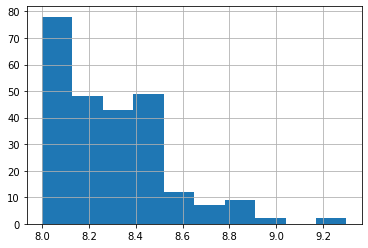

In [209]:
dane_df.Rating.hist()